Load an image:


In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
src = cv.imread(cv.samples.findFile(r"C:\Users\robert\source\repos\3BPM\test3\pyCalibration\data\aruco0.png"), cv.IMREAD_COLOR)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


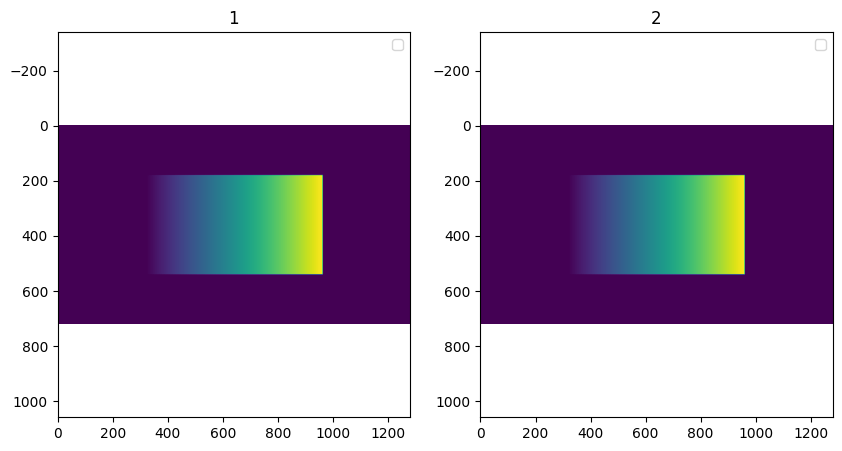

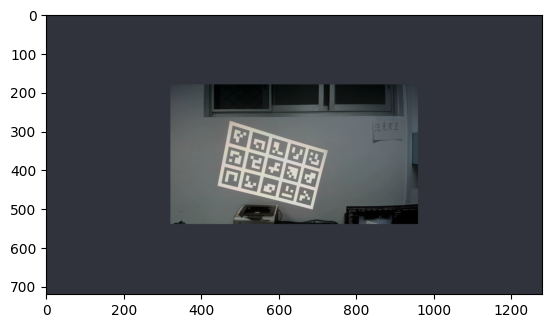

In [14]:
# Create the destination image and the two mapping matrices (for x and y )
def check2ttt(map_x,map_y):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('1')
    plt.imshow(map_x)
    plt.legend()
    plt.axis('equal')
    plt.subplot(1, 2, 2)
    plt.title('2')
    plt.imshow(map_x) 
    plt.axis('equal')
    plt.legend()
    plt.show()
def update_map(ind, map_x, map_y):
    if ind == 0:
        for i in range(map_x.shape[0]):
            for j in range(map_x.shape[1]):
                if j > map_x.shape[1]*0.25 and j < map_x.shape[1]*0.75 and i > map_x.shape[0]*0.25 and i < map_x.shape[0]*0.75:
                    map_x[i,j] = 2 * (j-map_x.shape[1]*0.25) + 0.5
                    map_y[i,j] = 2 * (i-map_y.shape[0]*0.25) + 0.5
                else:
                    map_x[i,j] = 0
                    map_y[i,j] = 0
    elif ind == 1:
        for i in range(map_x.shape[0]):
            map_x[i,:] = [x for x in range(map_x.shape[1])]
            for j in range(map_y.shape[1]):
                map_y[:,j] = [map_y.shape[0]-y for y in range(map_y.shape[0])]
    elif ind == 2:
        for i in range(map_x.shape[0]):
            map_x[i,:] = [map_x.shape[1]-x for x in range(map_x.shape[1])]
            for j in range(map_y.shape[1]):
                map_y[:,j] = [y for y in range(map_y.shape[0])]
    elif ind == 3:
        for i in range(map_x.shape[0]):
            map_x[i,:] = [map_x.shape[1]-x for x in range(map_x.shape[1])]
            for j in range(map_y.shape[1]):
                map_y[:,j] = [map_y.shape[0]-y for y in range(map_y.shape[0])]
map_x = np.zeros((src.shape[0], src.shape[1]), dtype=np.float32)
map_y = np.zeros((src.shape[0], src.shape[1]), dtype=np.float32)
# Create a window to display results


ind = 0

update_map(ind, map_x, map_y)
check2ttt(map_x,map_y)

ind = (ind + 1) % 4
dst = cv.remap(src, map_x, map_y, cv.INTER_LINEAR)
plt.imshow(dst)
plt.show()

    


The function that applies the remapping is cv::remap . We give the following arguments:

src: Source image
dst: Destination image of same size as src
map_x: The mapping function in the x direction. It is equivalent to the first component of 
map_y: Same as above, but in y direction. Note that map_y and map_x are both of the same size as src
INTER_LINEAR: The type of interpolation to use for non-integer pixels. This is by default.
BORDER_CONSTANT: Default
How do we update our mapping matrices mat_x and mat_y? Go on reading:

Updating the mapping matrices: We are going to perform 4 different mappings:
Reduce the picture to half its size and will display it in the middle:
for all pairs 
 such that: 
 
 
 and 
 
 
Turn the image upside down: 
Reflect the image from left to right: 
Combination of b and c: 
This is expressed in the following snippet. Here, map_x represents the first coordinate of h(i,j) and map_y the second coordinate.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1, 2, 480, 640)


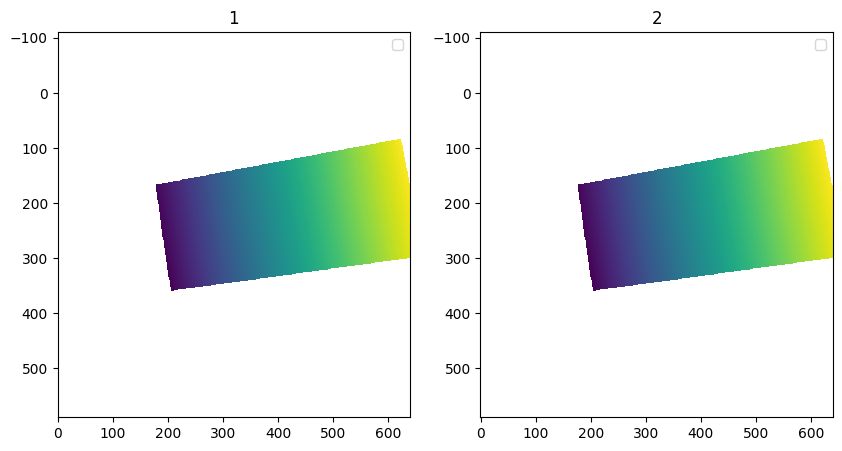

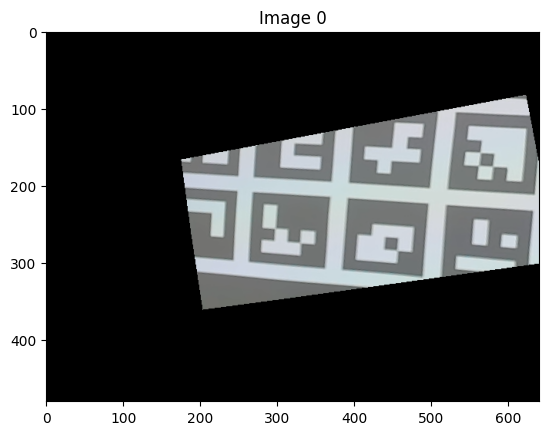

In [15]:
map_matrixs = np.load(r"C:\Users\robert\source\repos\3BPM\test3\pyCalibration\result\match.npy")
# Corrects the projected image according to the matching result
print(map_matrixs.shape)
for idx,map_martix in enumerate(map_matrixs):
    part = cv.remap(src, map_martix[0], map_martix[1], interpolation=cv.INTER_LINEAR)
    check2ttt( map_martix[0],map_martix[1],)
    plt.imshow(cv.cvtColor(part, cv.COLOR_BGR2RGB))
    plt.title(f'Image {idx}')
    plt.show()
     
